In [45]:
#Dependencies 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [46]:
file = "Resources/car_insurance_claim.csv"
claim_data = pd.read_csv(file)
claim_data.head()

,ID,KIDSDRIV,BIRTH,AGE,HOMEKIDS,YOJ,INCOME,PARENT1,HOME_VAL,MSTATUS,...,CAR_TYPE,RED_CAR,OLDCLAIM,CLM_FREQ,REVOKED,MVR_PTS,CLM_AMT,CAR_AGE,CLAIM_FLAG,URBANICITY
0,63581743,0,16MAR39,60,0,11,"$67,349",No,$0,z_No,...,Minivan,yes,"$4,461",2,No,3,$0,18,0,Highly Urban/ Urban
1,132761049,0,21JAN56,43,0,11,"$91,449",No,"$257,252",z_No,...,Minivan,yes,$0,0,No,0,$0,1,0,Highly Urban/ Urban
2,921317019,0,18NOV51,48,0,11,"$52,881",No,$0,z_No,...,Van,yes,$0,0,No,2,$0,10,0,Highly Urban/ Urban
3,727598473,0,05MAR64,35,1,10,"$16,039",No,"$124,191",Yes,...,z_SUV,no,"$38,690",2,No,3,$0,10,0,Highly Urban/ Urban
4,450221861,0,05JUN48,51,0,14,NaN,No,"$306,251",Yes,...,Minivan,yes,$0,0,No,0,$0,6,0,Highly Urban/ Urban


In [47]:
claim_data.count()

ID            10302
KIDSDRIV      10302
BIRTH         10302
AGE           10295
HOMEKIDS      10302
YOJ            9754
INCOME         9732
PARENT1       10302
HOME_VAL       9727
MSTATUS       10302
GENDER        10302
EDUCATION     10302
OCCUPATION     9637
TRAVTIME      10302
CAR_USE       10302
BLUEBOOK      10302
TIF           10302
CAR_TYPE      10302
RED_CAR       10302
OLDCLAIM      10302
CLM_FREQ      10302
REVOKED       10302
MVR_PTS       10302
CLM_AMT       10302
CAR_AGE        9663
CLAIM_FLAG    10302
URBANICITY    10302
dtype: int64

In [48]:
#drop rows with missing information & data 
claim_data = claim_data.dropna(how='any')
claim_data.count()

ID            7657
KIDSDRIV      7657
BIRTH         7657
AGE           7657
HOMEKIDS      7657
YOJ           7657
INCOME        7657
PARENT1       7657
HOME_VAL      7657
MSTATUS       7657
GENDER        7657
EDUCATION     7657
OCCUPATION    7657
TRAVTIME      7657
CAR_USE       7657
BLUEBOOK      7657
TIF           7657
CAR_TYPE      7657
RED_CAR       7657
OLDCLAIM      7657
CLM_FREQ      7657
REVOKED       7657
MVR_PTS       7657
CLM_AMT       7657
CAR_AGE       7657
CLAIM_FLAG    7657
URBANICITY    7657
dtype: int64

In [49]:
#claim_data[['TRAVTIME']].head()

In [50]:
# CLEANING DATA

# 1. get rid of '$' & ',' and convertcolumns values to numeric in 
    
# CLM_AMT
claim_data['CLM_AMT'] = claim_data['CLM_AMT'].str.replace('$','').str.replace(',','')
claim_data['CLM_AMT'] = pd.to_numeric(claim_data['CLM_AMT'])
# OLDCLAIM
claim_data['OLDCLAIM'] = claim_data['OLDCLAIM'].str.replace('$','').str.replace(',','')
claim_data['OLDCLAIM'] = pd.to_numeric(claim_data['OLDCLAIM'])
#INCOME
claim_data['INCOME'] = claim_data['INCOME'].str.replace('$','').str.replace(',','')
claim_data['INCOME'] = pd.to_numeric(claim_data['INCOME'])
#HOME_VAL
claim_data['HOME_VAL'] = claim_data['HOME_VAL'].str.replace('$','').str.replace(',','')
claim_data['HOME_VAL'] = pd.to_numeric(claim_data['HOME_VAL'])


# 2. convert float data to integers in AGE, CAR_AGE, and TRAVTIME 

pd.options.display.float_format = '{:,.0f}'.format
#claim_data.round(0).astype(int)

In [51]:
claim_data.head()

,ID,KIDSDRIV,BIRTH,AGE,HOMEKIDS,YOJ,INCOME,PARENT1,HOME_VAL,MSTATUS,...,CAR_TYPE,RED_CAR,OLDCLAIM,CLM_FREQ,REVOKED,MVR_PTS,CLM_AMT,CAR_AGE,CLAIM_FLAG,URBANICITY
0,63581743,0,16MAR39,60,0,11,67349,No,0,z_No,...,Minivan,yes,4461,2,No,3,0,18,0,Highly Urban/ Urban
1,132761049,0,21JAN56,43,0,11,91449,No,257252,z_No,...,Minivan,yes,0,0,No,0,0,1,0,Highly Urban/ Urban
2,921317019,0,18NOV51,48,0,11,52881,No,0,z_No,...,Van,yes,0,0,No,2,0,10,0,Highly Urban/ Urban
3,727598473,0,05MAR64,35,1,10,16039,No,124191,Yes,...,z_SUV,no,38690,2,No,3,0,10,0,Highly Urban/ Urban
6,871024631,0,05MAY65,34,1,12,125301,Yes,0,z_No,...,Sports Car,no,0,0,No,0,2946,7,1,Highly Urban/ Urban


In [52]:
claim_data.columns

Index(['ID', 'KIDSDRIV', 'BIRTH', 'AGE', 'HOMEKIDS', 'YOJ', 'INCOME',
       'PARENT1', 'HOME_VAL', 'MSTATUS', 'GENDER', 'EDUCATION', 'OCCUPATION',
       'TRAVTIME', 'CAR_USE', 'BLUEBOOK', 'TIF', 'CAR_TYPE', 'RED_CAR',
       'OLDCLAIM', 'CLM_FREQ', 'REVOKED', 'MVR_PTS', 'CLM_AMT', 'CAR_AGE',
       'CLAIM_FLAG', 'URBANICITY'],
      dtype='object')

In [53]:
# Assumption: drop unnecessary variables 

claim_data.drop(columns=['BIRTH','REVOKED','BLUEBOOK','TIF','MVR_PTS', 'PARENT1','CLAIM_FLAG','MSTATUS','HOMEKIDS',
                         'PARENT1','YOJ'], inplace=True)
claim_data.head()

,ID,KIDSDRIV,AGE,INCOME,HOME_VAL,GENDER,EDUCATION,OCCUPATION,TRAVTIME,CAR_USE,CAR_TYPE,RED_CAR,OLDCLAIM,CLM_FREQ,CLM_AMT,CAR_AGE,URBANICITY
0,63581743,0,60,67349,0,M,PhD,Professional,14,Private,Minivan,yes,4461,2,0,18,Highly Urban/ Urban
1,132761049,0,43,91449,257252,M,z_High School,z_Blue Collar,22,Commercial,Minivan,yes,0,0,0,1,Highly Urban/ Urban
2,921317019,0,48,52881,0,M,Bachelors,Manager,26,Private,Van,yes,0,0,0,10,Highly Urban/ Urban
3,727598473,0,35,16039,124191,z_F,z_High School,Clerical,5,Private,z_SUV,no,38690,2,0,10,Highly Urban/ Urban
6,871024631,0,34,125301,0,z_F,Bachelors,z_Blue Collar,46,Commercial,Sports Car,no,0,0,2946,7,Highly Urban/ Urban


In [54]:
# group data by KIDSDRIV colomn 
claim_kids_drive = claim_data.groupby(['KIDSDRIV'],as_index=False)

# Calculate claim averages using the .mean() method
claim_kids = claim_kids_drive.mean()
claim_kids

#claim_kids=[['KIDSDRIV','OLDCLAIM','CLM_AMT']]


,KIDSDRIV,ID,AGE,INCOME,HOME_VAL,TRAVTIME,OLDCLAIM,CLM_FREQ,CLM_AMT,CAR_AGE
0,0,"497,185,381",45,"58,457","150,553",34,"3,932",1,"1,391",8
1,1,"506,878,766",43,"53,349","145,064",34,"4,970",1,"2,154",7
2,2,"494,532,440",43,"54,709","149,941",34,"4,063",1,"1,956",7
3,3,"517,851,167",43,"51,607","142,389",34,"4,837",1,"2,640",7
4,4,"480,618,672",64,"63,900","230,188",55,"12,196",0,0,4


Text(0, 0.5, 'Average claims')

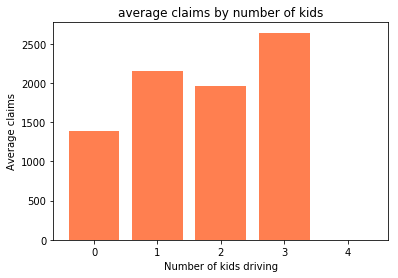

In [55]:
# average claims by number of kids driving 

x = claim_kids['KIDSDRIV']
y = claim_kids['CLM_AMT']

plt.bar(x, y, color= 'coral', alpha=1, align="center")

plt.title('average claims by number of kids')
plt.xlabel('Number of kids driving')
plt.ylabel('Average claims')

# Save the figure as png file
plt.savefig("Images/AVG_CLAIM_BY_KIDSDRIVE.png")


Text(0, 0.5, 'Average old claims')

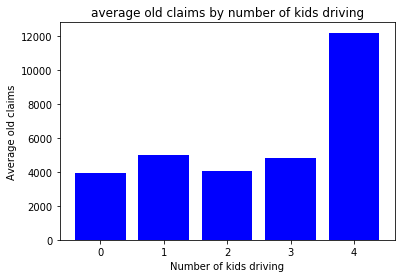

In [56]:
# average old claims by number of kids driving

y1 = claim_kids['OLDCLAIM']
plt.bar(x, y1, color= 'blue', alpha=1, align="center")
plt.title('average old claims by number of kids driving')
plt.xlabel('Number of kids driving')
plt.ylabel('Average old claims')

# Save the figure as png file
plt.savefig("Images/AVG_OLDCLAIM_BY_KIDSDRIVE.png")


In [60]:
# group data by CAR_USE colomn calculate their avrages 
claim_car = claim_data.groupby(['CAR_USE'],as_index=False)

claim_car_use= claim_car.sum()
claim_car_use


,CAR_USE,ID,KIDSDRIV,AGE,INCOME,HOME_VAL,TRAVTIME,OLDCLAIM,CLM_FREQ,CLM_AMT,CAR_AGE
0,Commercial,1313143222959,450,"112,306",147191078,378704298,86749,11192486,2303,5401366,"17,017"
1,Private,2500226837990,868,"229,966",295929308,770247787,171052,19653340,3749,5934136,"43,419"


Text(0, 0.5, 'total claims')

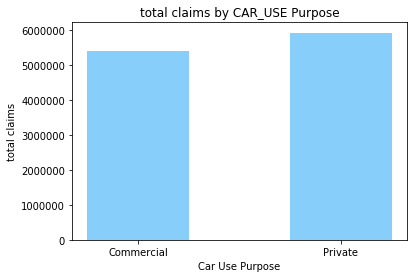

In [69]:
# total claims by CAR_USE 

x = claim_car_use['CAR_USE']
y = claim_car_use['CLM_AMT']
Y1= claim_car_use['OLDCLAIM']
plt.bar(x, y, color= 'lightskyblue', alpha=1, align="center", width=0.5)

plt.title('total claims by CAR_USE Purpose')
plt.xlabel('Car Use Purpose')
plt.ylabel('total claims')

# Save the figure as png file
plt.savefig("Images/total_claims_by_CAR_USE.png")

In [ ]:
https://github.com/hmakhlouf/Unit-4-Assignment---Pandas/blob/master/PyCitySchools/PyCitySchools_starter.ipynb